<a href="https://colab.research.google.com/github/astrax/ALOP_Module5-6/blob/master/cours1/Chapitre%201%20Traitement%20d'images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Mme. S. Darragi M. A. Ammar : Classes Spè*

# Introduction
Le traitement d’images est une discipline à part entière en informatique et les applications en sont sont très
nombreuses. On peut évoquer par exemple les usages suivants :
* la retouche numérique de photos ;
*  la dissimulation d’un message dans une image (la stéganographie) ;
*  l’imagerie médicale ;
*  l’astronomie. Dans ce cas les images brutes collectées par les télescopes subissent toujours des traitements
complexes pour éliminer le bruit dû aux instruments, augmenter les contrastes, exhiber les contours ou analyser/modifier la colorimétrie.

Ce chapitre sera l’occasion d’aborder la base de cette discipline.

# Comment est codée une image ?
Une image numérique peut être représentée par **une matrice** dans laquelle chaque case représente un pixel (pour *picture element* en anglais), unité minimale adressable par le contrôleur vidéo et supposé de couleur uniforme. Le format de l’image (**png, jpeg**, etc) désigne la manière dont cette matrice est représentée en mémoire.
* pour une **image en couleur**, chaque **pixel** et encodé sur **trois octets**, chaque octet représentant une nuance de couleur.
## Image monochrome
Une image monochrome est une image en *noir et blanc* où chaque pixel ne peut prendre que deux valeurs (généralement **0** ou **1**), ce qui permet de l’encoder sur un seul bit.
![](https://github.com/CodeTunisia/InformatiqueMathsSpe-2122/blob/main/cours1/figures/monochrome.png?raw=1)
## Image en niveau de gris
Une image en niveau de gris, chaque teinte de gris (en passant *du noir au blanc*) est encodée sur **un octet**, ce qui permet de représenter $2^8 = 256$ nuances de gris ; Ce qui veut dire qu’une image de taille (n,p) en niveau de gris est **une matrice** de la même taille que `Im` où chaque composante `M[i,j]` est un entier compris entre 0 et 255 (pour une matrice entière avec 0 pour noir et 255 pour blanc et le reste c’est des niveaux de gris) ou un réel entre 0 et 1 pour une matrice réelle.
![](https://github.com/CodeTunisia/InformatiqueMathsSpe-2122/blob/main/cours1/figures/gris.png?raw=1)
## Codage d'une image en couleur
Les images fournies par les appareils photo sont généralement en couleur. Une image en couleur est constituée de **trois couches** : une couche rouge (**R**), une couche verte (**V**) et une couche bleue (**B**).

Cette image sera représentée par 3 matrices superposées (ou 4) par exemple, dans le cas du format **RGB (Red, Green, Blue)**, le première matrice dose la quantité de rouge, le second la quantité de vert et le troisième la quantité de bleu pour une synthèse additive enfin, les pixels d’une image en couleur peuvent être encodés par quatre octets au format **RGBA (A pour alpha)**, le quatrième octet (4 ème matrice) codant la transparence du pixel.

Soit $N_x$ le nombre de colonnes de l'image et $N_y$ le nombre de lignes. Le nombre de pixels total est $N = N_x \times N_y$. Chaque couche est une matrice comportant $N_y$ lignes et $N_x$ colonnes. Le plus souvent, cette matrice contient des **entiers codés sur 8 bits (les valeurs vont de 0 à 255)**.

Pour l'image en couleur complète, il y a donc $8 \times 3 = 24$ bits par pixels, **à multiplier par le nombre de pixels** pour obtenir l'occupation totale en mémoire.

Chaque couche peut être vue comme une image en niveaux de gris. Le niveau 0 est le noir, le
niveau 255 est le blanc, le niveau 128 est un gris moyen.
![](https://github.com/CodeTunisia/InformatiqueMathsSpe-2122/blob/main/cours1/figures/pixelscouleur.png?raw=1)

# Les images Sous Python

## Création d’une image Avec numpy
Une image est codée sous Python à l’aide d’une matrice `M` à trois dimensions **(n,p,3)** La première dimension représente le **nombre de lignes**, la seconde le **nombre de colonnes** et la dernière le **nombre de couleur**. Chaque couleur représente un entier codé avec le format `np.uint8` (**uint8** : entier codé sur 8 bits et prennent des valeurs entre 0 et 255) ou un réel entre 0 et 1.

On prendra garde au fait qu'avec les entiers de type **uint8** on calcule **modulo 256**.

Par exemple,
$$114 + 171 = 285 = 256 + 29 = 29 \ [256]$$


In [1]:
import numpy as np
x = np.uint8(312); y = np.uint8(123)
z = x + y ; z

179

In [3]:
2 * z

358

In [4]:
d = np.uint8(2)

In [5]:
d * z

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in ubyte_scalars
  """Entry point for launching an IPython kernel.


102

In [6]:
z * 0.1

17.900000000000002

In [7]:
np.uint8(z * 0.1)

17

## Accès aux éléments de la matrice
Soit la matrice de couleurs `M`, `i` le numéro de la ligne, `j` le numéro de la colonne `M[i,j] = [R,G,B]` c’est-à-dire `M[i,j]` est un triplet `[niv_rouge,niv_vert,niv_bleu]`.

**Exemple :**

In [8]:
n, p = 6, 6
M = np.uint8(np.random.rand(n,p,3) * 255)

In [9]:
M[1, 2] # pixel sur la 2ème ligne et la 3ème colonne est de couleur? 

array([193,  88, 221], dtype=uint8)

Nous pouvons également accéder par blocs `M[ Début_ligne: fin_ligne, début_colonne: fin_colonne] = [R,G,B]`

**Exemple :**

In [10]:
M[ : , :p//2] # où p est le nombre de colonnes alors ceci donne la moitié gauche de l’image.

array([[[150, 180, 162],
        [140,   5, 144],
        [202, 195,  10]],

       [[ 26, 127,  59],
        [ 76, 197, 195],
        [193,  88, 221]],

       [[247, 159, 165],
        [ 88,  39, 184],
        [110,  92, 183]],

       [[202,  48, 112],
        [151, 190,  26],
        [208, 193, 102]],

       [[ 13,  43, 225],
        [ 23,  56,  62],
        [ 27, 159,  24]],

       [[231, 106,  13],
        [161, 118, 187],
        [167,  54, 195]]], dtype=uint8)

### Affichage d’une image Avec matplotlib.pyplot
En plus de la bibliothèque numpy, on a besoin d’importer la bibliothèque `matplotlib.pyplot` pour afficher une image en utilisant les fonctions suivantes :
1. plt.**imshow**(M, cmap : str or Colormap, optional) : affiche une image basée sur la matrice M, avec cmap comme couleur de fond
2. plt.**imsave**('nom_image.png',M) : enregistre une matrice M de type ndarray en tant que fichier image 
3. plt.**show**()

**Exemple :**

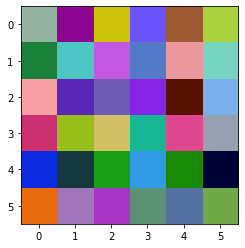

In [22]:
import matplotlib.pyplot as plt
plt.imshow(M)
plt.imsave("pixels.png", M)
plt.show()

Le module matplotlib.pyplot permet de charger des images directement dans un tableau numpy à l’aide de la commande `img=plt.imread (fname, format=None)`
* ***fname** : le nom ou le chemin vers le fichier image à ouvrir (str)
* **format** : optionnel, le format de fichier image supposé pour la lecture des données. S'il n'est pas indiqué, le format est déduit du nom du fichier. Si rien ne peut être déduit, le format PNG est essayé.

Le résultat, `img` est un tableau numpy. C'est parfois un tableau de réel (compris entre 0 et 1) ou parfois un tableau d'entiers. On peut être amené à faire une transformation si le tableau est réel:
Si l’image est de type réel `np.dtype=float64` et que vous souhaitez manipuler des entiers (facilite d’utilisation de l’intervalle $[0..255]$ ) il faut transformer par : `img = (img * 255).astype(np.uint8)`

**Exemple :**
* Téléchargement de l'image 

In [40]:
!wget https://raw.githubusercontent.com/CodeTunisia/InformatiqueMathsSpe-2122/main/cours1/figures/joconde.jpg

--2021-09-23 22:32:06--  https://raw.githubusercontent.com/CodeTunisia/InformatiqueMathsSpe-2122/main/cours1/figures/joconde.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29250 (29K) [image/jpeg]
Saving to: ‘joconde.jpg’

joconde.jpg         100%[===================>]  28.56K  --.-KB/s    in 0.001s  

2021-09-23 22:32:06 (54.6 MB/s) - ‘joconde.jpg’ saved [29250/29250]



* Affichage de l'image

In [42]:
img=plt.imread("joconde.jpg")
print(img.shape, img.dtype)

(387, 260, 3) uint8


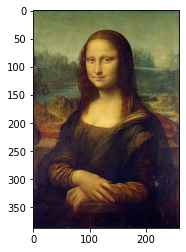

In [43]:
plt.imshow(img)
plt.show()

## Ouvrire une image avec la librairie Python Pillow (PIL)
La librairie **PIL** (Python Imaging Library) fournit les outils nécessaires pour les manipulations d'images que nous pouvons utiliser pour ouvrir et manupuler des image. Ces manipulations sont simples et il existe des libraries plus complètes pour aborder les fonctions avancées de traitement des images. Vous trouverez une description des fonctions disponibles dans PIL à travers ce lien :https://pillow.readthedocs.io/en/stable/index.html, et bien d'autres...
### Ouverture du fichier image

In [44]:

from PIL import Image
img_PIL = Image.open('joconde.jpg')
print(type(img))
print(img_PIL.format,img_PIL.size, img_PIL.mode)


<class 'numpy.ndarray'>
JPEG (260, 387) RGB


### affichage de l'image

In [45]:
img_PIL.show() 

### Convertir une image PIL en Numpy Array

In [46]:
img_np = np.asarray(img_PIL, dtype = np.uint8)

(387, 260, 3) uint8


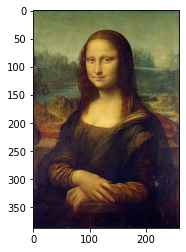

In [47]:
print(img_np.shape, img_np.dtype)
plt.imshow(img_np)
plt.show()

### Fermeture du fichier image

In [48]:
img_PIL.close()

# Utiliser les librairies classiques imageio et matplotlib
Il est aussi possible d'utiliser les librairies `imageio` et `matplotlib` pour lire et afficher une image. Le script Python suivant en donne un exemple. Vous noterez qu'ici, l'image s'affiche sur la console Python et non dans une fenêtre particulière gérée par le programme par défaut d'affichage de votre OS. Cela peut dans certains cas, présenter un intérêt. 

<class 'imageio.core.util.Array'> (387, 260, 3) uint8


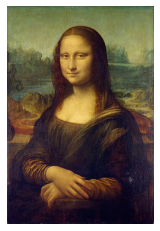

In [52]:
# importation des librairies
import imageio
import matplotlib.pyplot as plt
# ouverture du fichier image
img = imageio.imread('joconde.jpg')

# affichage des caractéristiques de l'image
print(type(img), img.shape, img.dtype)
# affichage de l'image
plt.imshow(img)
plt.axis('off')
plt.show()